## Homework 3  |  Yuxiao Zheng

### Problem 1
#### The Binomial Distribution

![bd.png](bd.png)

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

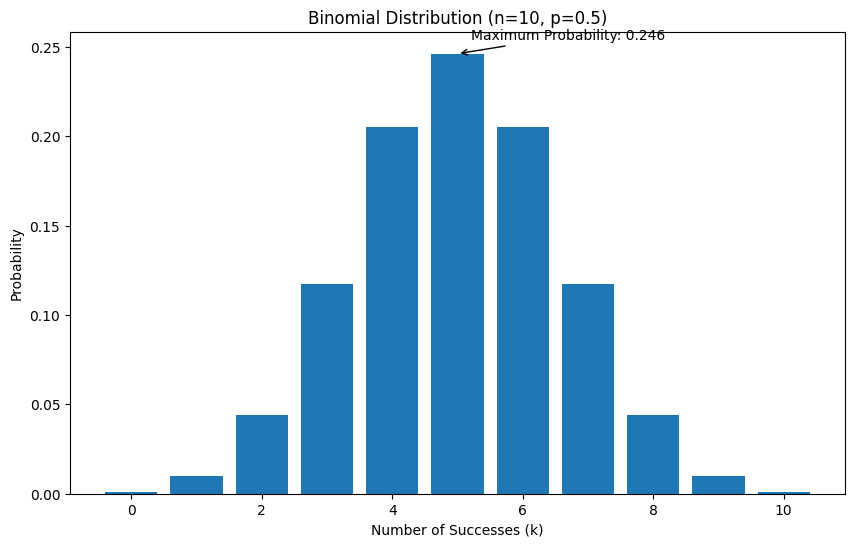

In [5]:
## calculate every binomial probability
def binomial_distribution(n, k, p):
    """Calculates the probability of k successes in n coin flipping with probability p of success."""
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k)) * (p ** k) * (1 - p) ** (n - k)

## draw this graph to prove the expected outcomes of problem one
def plot_binomial_distribution_to_prove_problem_one(n, p):
    """Plots the binomial distribution for given n and p."""

    probabilities = []
    for k in range(n + 1):
        # print(binomial_distribution(n, k, p))
        probability = binomial_distribution(n,k,p)
        probabilities.append(probability)

    plt.figure(figsize=(10, 6))
    plt.bar(range(n + 1), probabilities)
    plt.xlabel("Number of Successes (k)")
    plt.ylabel("Probability")
    plt.title(f"Binomial Distribution (n={n}, p={p})")

    # Find the maximum probability and its corresponding k value
    max_probability = max(probabilities)
    max_k = probabilities.index(max_probability)

    # Annotate the maximum probability point
    plt.annotate(f"Maximum Probability: {max_probability:.3f}", xy=(max_k, max_probability), xytext=(10, 10), textcoords="offset points", arrowprops=dict(arrowstyle="->"))

    plt.show()


# Example usage:
n = 10
p = 1/2
plot_binomial_distribution_to_prove_problem_one(n, p)

## Problem 2
### Compute how this median probability changes as a function of the total number of outcomes, n.
![2.1.png](2.1.png)
![2.2.png](2.2.png)

## stirling_binomial function
1. create this function to take a parameter n, which is the total number of coin flippings.
2. use Stirling's formula `ln(n!) ≈ n ln(n) − n`
3. use binomial_distribution formula
4. return the median probability 

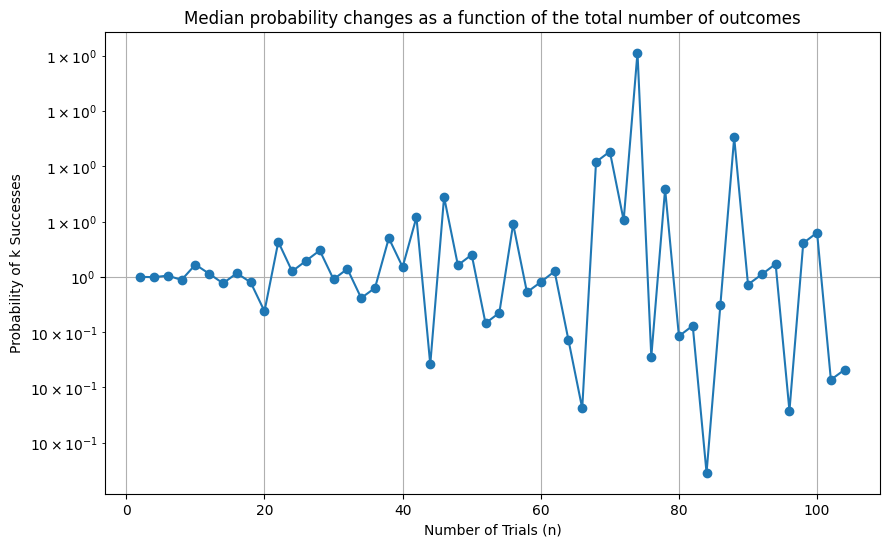

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def stirling_binomial(n):
    # Using Stirling's approximation to calculate binomial coefficient when k = n/2
    if n % 2 != 0:
        return 0  # We can only calculate this when n is even
    n_half = n // 2
    ln_n_factional = n * np.log(n) - n   # follow ln(n!) ≈ n ln(n) − n
    ln_n_half_factional = n_half * np.log(n_half) - n_half
    ln_binomial = ln_n_factional - 2 * ln_n_half_factional
    binomial = np.exp(ln_binomial)
    p_median = binomial * (0.5 ** n)
    return p_median

# Plotting the median probability for a range of n values
n_values = range(2, 105, 2)
probabilities = [stirling_binomial(n) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, probabilities, marker='o')
plt.yscale('log')  
plt.title('Median probability changes as a function of the total number of outcomes')
plt.xlabel('Number of Trials (n)')
plt.ylabel('Probability of k Successes')
plt.grid(True)
plt.show()